In [49]:
import openpyxl
import numpy as np
from sklearn import preprocessing

## Abrir Excel con Datos
file_train = 'CREDITRISK_RAW.xlsx'
wb = openpyxl.load_workbook(file_train)
sheet = wb.get_sheet_by_name('Sheet1')
sheet = wb.active

# Forma matriz para contener datos
columns = 20
rows = 2294
data_matrix = np.zeros(shape=(rows, columns))

# Columnas con datos no numericos, se deben pasar a labels numericos usando un LabelEncoder
non_numerical_columns = [1, 4, 5, 8, 18, 19]  ##
non_numerical_info = []
clases = []
clases_num_encode = []
features_names = []
empty_cell = sheet.cell(row=85, column=8).value  ## Ejemplo de celda vacia

for i in range(columns):
    j = 0
    column_i = []
    
    flag_non_numeric = False
    flag_append = True
    
    # Verificar si la columna es de datos no numericos
    if i in non_numerical_columns:
        flag_non_numeric = True
            
    for cellObj in sheet.columns[i]:
        if j > 0:
            if (cellObj.value == empty_cell) and (not flag_non_numeric):
            #if (cellObj.value == empty_cell):
                #flag_append = False
                column_i.append(0)
            else:
                column_i.append(cellObj.value)
        
        else:
            name = cellObj.value
            if i>0:
                features_names.append(name)
            print name
            
            
        j += 1
    
    
    if flag_non_numeric:
        le = preprocessing.LabelEncoder()
        le.fit(column_i)
        clases.append(list(le.classes_))
              
        n_clases = len(le.classes_)
        ordered_clases = np.linspace(0, n_clases - 1, n_clases)
        inverse_ordered = le.inverse_transform(list(ordered_clases.astype(int)))
        print ordered_clases
        print "Labels: ", str(inverse_ordered)
        
        
        non_numerical_info.append(sheet.cell(row=1, column=i+1).value)
        
        # Encode de datos
        column_i = le.transform(column_i)
      
    if flag_append:
        data_matrix[:,i] = column_i
    else:
        print name + " no added"

   

ID
GENERO
[ 0.  1.  2.]
Labels:  [None u'F       ' u'M       ']
RENTA
EDAD
NIV_EDUC
[ 0.  1.  2.  3.  4.  5.  6.]
Labels:  [None u'        ' u'BAS     ' u'EUN     ' u'MED     ' u'TEC     '
 u'UNV     ']
E_CIVIL
[ 0.  1.  2.  3.  4.]
Labels:  [None u'CAS     ' u'SEP     ' u'SOL     ' u'VIU     ']
COD_OFI
COD_COM
CIUDAD
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.]
Labels:  [None u'                ' u'ANCUD           ' u'ANGOL           '
 u'ANTOFAGASTA     ' u'ARICA           ' u'AYSEN           '
 u'CALAMA          ' u'CALBUCO         ' u'CALDERA         '
 u'CASABLANCA      ' u'CASTRO          ' u'CHILLAN         '
 u'CHUQUICAMATA    '

In [3]:
# Eliminar NaN values
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_matrix)

data_matrix = imp.transform(data_matrix)

In [4]:
## Calculo de caracteristicas

start_money_values = 9
finish_money_values = 12

"""
for i in range(12-9):
    for j in range(len(data_matrix[:,0])):
        sueldo = data_matrix[j,2]
        data_matrix[:,9+i] = data_matrix[:,9+i]/sueldo 
"""


'\nfor i in range(12-9):\n    for j in range(len(data_matrix[:,0])):\n        sueldo = data_matrix[j,2]\n        data_matrix[:,9+i] = data_matrix[:,9+i]/sueldo \n'

C:\Users\Nico\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature ranking:
1. EDAD: 0.192048801312
2. GENERO: 0.137015893232
3. COD_COM: 0.103570298066
4. NIV_EDUC: 0.101082340377
5. COD_OFI: 0.0789681444771
6. Número de meses inactivo: 0.0647032433587
7. RENTA: 0.0466521257872
8. Crédito_4: 0.0452539572166
9. CIUDAD: 0.0426592923834
10. numero de cuotas: 0.0344216239954
11. E_CIVIL: 0.0340378330588
12. Crédito_2: 0.0330526391871
13. Monto solicitado: 0.0321035251041
14. Monto Deuda Promedio: 0.0253492964145
15. Días de Mora: 0.0115829033048
16. Crédito_1: 0.00957717496904
17. Aval: 0.00591888168265
18. Crédito_3: 0.00200202607376


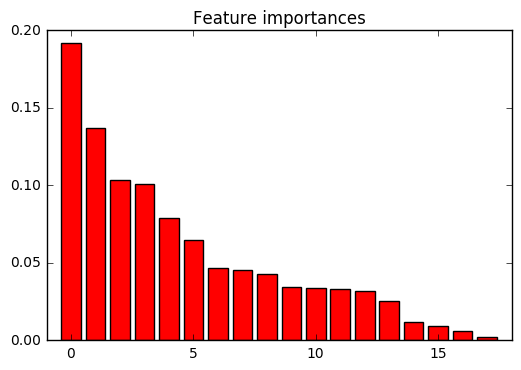

In [5]:
## Random Forest

%matplotlib inline
import matplotlib.pylab as plt

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

N_features = (columns - 1) # Se resta ID y Label, PAGA o NO PAGA
X = data_matrix[:,1:N_features]
Y = data_matrix[:,columns - 1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state = True)


clf = RandomForestClassifier(n_estimators=650, max_depth=None, bootstrap = True, n_jobs = -1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [6]:
from time import time
from sklearn import metrics
t0 = time()
pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

score = metrics.accuracy_score(Y_test, pred)
print score

test time:  0.793s
0.938099389712


In [46]:
#Graficos en base a las caracteristicas más importantes según Random Forest

class Histogram:
    
    def __init__(self, data_matrix, feature_index, name):
        self.name = name
        self.index = feature_index
        self.data = np.zeros(shape=(rows, 2))
        
        _columns = len(data_matrix[0,:])
        self.data[:,0] = data_matrix[:, self.index]
        self.data[:,1] = data_matrix[:, _columns - 1]
        
        _N_datos = len(self.data[:,0])
        self.convert_data = np.zeros( shape = (_N_datos, 2))
    
        _Paga = 1;
        _NoPaga = 0;

        self.paga_hist = []
        self.no_paga_hist = []

        for i in range(_N_datos):
            if self.data[i,1] == _Paga:
                self.paga_hist.append( self.data[i,0])
            else:
                self.no_paga_hist.append( self.data[i,0])
                
        self.discrete = False

    def set_bins(self, init_range, final_range, nbins):
        self.bins = plt.linspace(init_range, final_range, nbins)
        self.nbins = nbins
        self.xlims = [init_range-0.5, final_range+0.5]
        print self.bins
        
    def is_discrete(self, discrete):
        init_range = 0
        final_range = discrete+0.5 
        nbins = discrete + 1
        self.bins = plt.linspace(init_range, final_range, nbins)
        self.nbins = discrete
        self.bar_l = plt.linspace(0,discrete-1, discrete)
        self.xlims = [-0.5, discrete+0.5]
        self.discrete = True

 
    
    def hist(self):
        _paid = self.paga_hist
        _no_paid = self.no_paga_hist
            
        x = [_paid, _no_paid]
        self.histo = plt.hist(x, self.bins)
        plt.clf()

        _to_bar_1 = self.histo[0][0]
        _to_bar_2 = self.histo[0][1]

        # Create the general blog and the "subplots" i.e. the bars
        f, ax1 = plt.subplots(1, figsize=(10,5))

        # Set the bar width
        bar_width = 0.75
        bar_width = (self.bins[self.nbins-1] - self.bins[0])/(self.nbins)

        # positions of the left bar-boundaries
        #bar_l = [(i+1)*2.5 for i in range(len(_to_bar_1))] #+ self.bins[0]
        bar_l = [self.bins[0] + (i+1)*(self.bins[self.nbins-1] - self.bins[0])/(self.nbins) for i in range(len(_to_bar_1))]
  
        if (self.discrete == True):
            bar_width = 1.0
            bar_l = self.bar_l
        
        
  
    
        # positions of the x-axis ticks (center of the bars as bar labels)
        tick_pos = [i+(bar_width/2) for i in bar_l] #+ self.bins[0] 

        # Create a bar plot, in position bar_1
        ax1.bar(bar_l,
                # using the pre_score data
                _to_bar_1,
                # set the width
                width=bar_width,
                # with the label pre score
                label='Paga',
                # with alpha 0.5
                alpha=0.5,
                # with color
                color='#808000')

        # Create a bar plot, in position bar_1
        ax1.bar(bar_l,
                # using the mid_score data
                _to_bar_2,
                # set the width
                width=bar_width,
                # with pre_score on the bottom
                bottom=_to_bar_1,
                # with the label mid score
                label='No paga',
                # with alpha 0.5
                alpha=0.5,
                # with color
                color='#4b0082')
        
        # Set the label and legends
        ax1.set_ylabel("Cantidad")
        ax1.set_xlabel(self.name)
        ax1.set_xlim(self.xlims)
        plt.legend(loc='upper left')

        # Set a buffer around the edge
        #plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
        



[ 20.          21.02272727  22.04545455  23.06818182  24.09090909
  25.11363636  26.13636364  27.15909091  28.18181818  29.20454545
  30.22727273  31.25        32.27272727  33.29545455  34.31818182
  35.34090909  36.36363636  37.38636364  38.40909091  39.43181818
  40.45454545  41.47727273  42.5         43.52272727  44.54545455
  45.56818182  46.59090909  47.61363636  48.63636364  49.65909091
  50.68181818  51.70454545  52.72727273  53.75        54.77272727
  55.79545455  56.81818182  57.84090909  58.86363636  59.88636364
  60.90909091  61.93181818  62.95454545  63.97727273  65.        ]


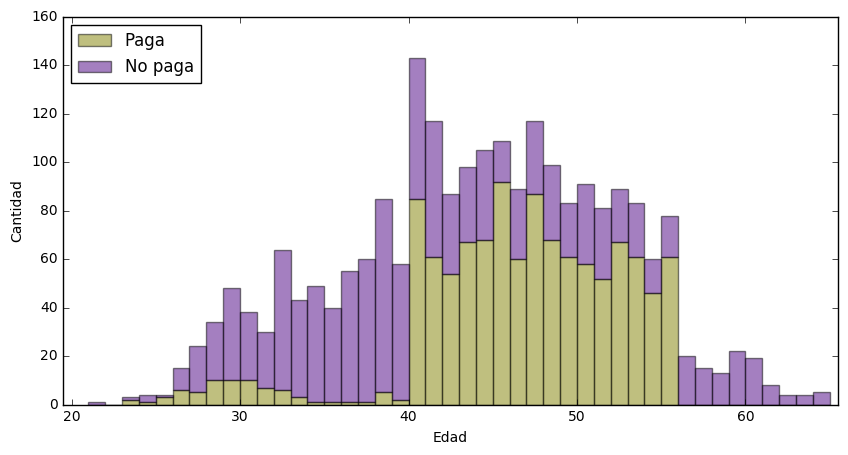

In [47]:
## EDAD ##
age_hist = Histogram(data_matrix, 3, "Edad")
age_hist.set_bins(20,65, 45) ## DE 20 a 60 años, 20 intervalos
age_hist.hist()

[   50000.           155555.55555556   261111.11111111   366666.66666667
   472222.22222222   577777.77777778   683333.33333333   788888.88888889
   894444.44444444  1000000.        ]


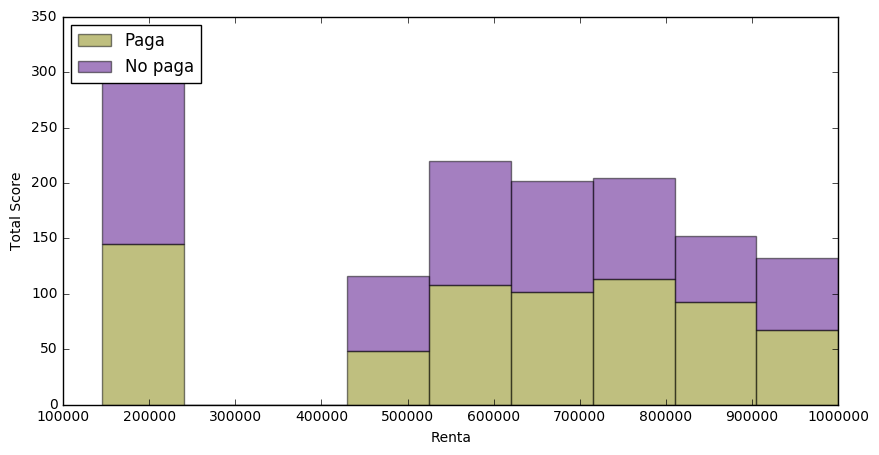

In [33]:
## RENTA ##
rent_hist = Histogram(data_matrix, 2, "Renta")
rent_hist.set_bins(50000, 1e6, 10)
rent_hist.hist()

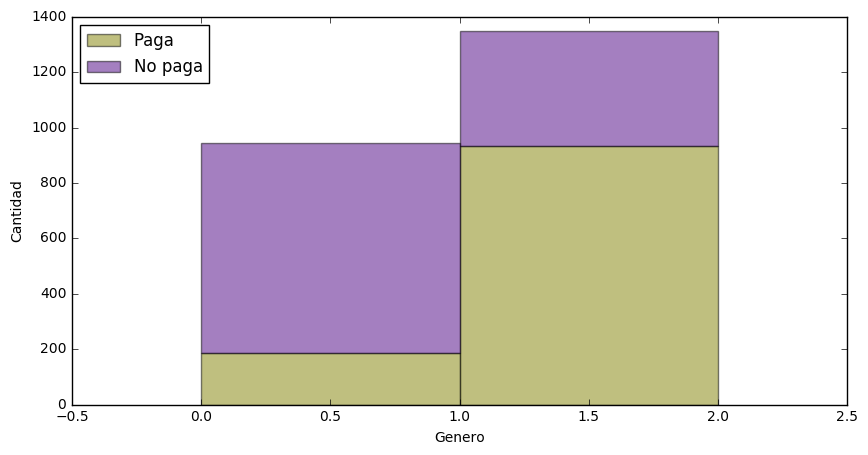

In [48]:
## GENERO ##
genre_hist = Histogram(data_matrix, 1, "Genero")
#rent_hist.set_bins(50000, 1e6, 10)
genre_hist.is_discrete(2)
genre_hist.hist()

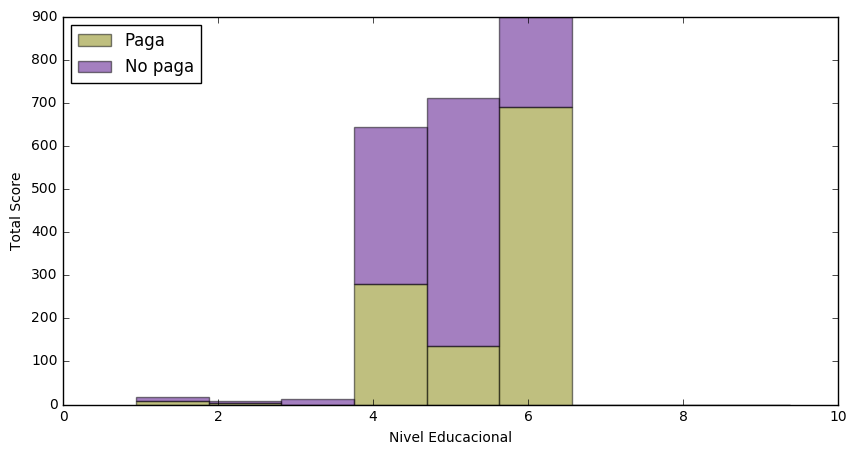

In [11]:
## NIVEL EDUCACIONAL ##
niv_ED_hist = Histogram(data_matrix, 4, "Nivel Educacional")
#rent_hist.set_bins(50000, 1e6, 10)
niv_ED_hist.is_discrete(9)
niv_ED_hist.hist()

[-1.         -0.82758621 -0.65517241 -0.48275862 -0.31034483 -0.13793103
  0.03448276  0.20689655  0.37931034  0.55172414  0.72413793  0.89655172
  1.06896552  1.24137931  1.4137931   1.5862069   1.75862069  1.93103448
  2.10344828  2.27586207  2.44827586  2.62068966  2.79310345  2.96551724
  3.13793103  3.31034483  3.48275862  3.65517241  3.82758621  4.        ]


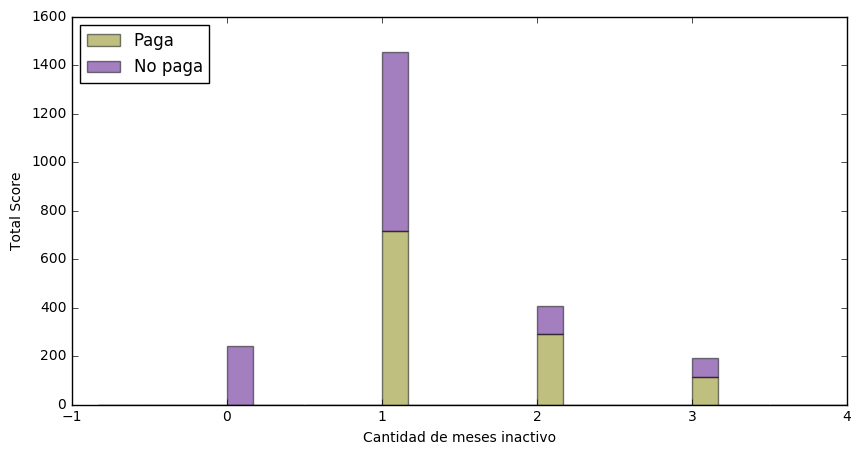

In [12]:
## CANTIDAD DE MESES INACTIVO ##
cod_com_hist = Histogram(data_matrix, 16, "Cantidad de meses inactivo")
cod_com_hist.set_bins(-1, 4, 30)
#cod_com_hist.is_discrete(9)
cod_com_hist.hist()

In [13]:
np.linspace(0, 3, 3+1)

array([ 0.,  1.,  2.,  3.])